In [13]:
from sklearn.datasets import make_moons

n_samples = 1000
X, y = make_moons(n_samples, 
                  noise=0.03, 
                  random_state=42)

In [ ]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

AttributeError: module 'torch' has no attribute 'cuda'

In [1]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).to(device)

NameError: name 'torch' is not defined

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [6]:
my_model = nn.Sequential(
    nn.Linear(in_features=2, out_features=32),
    nn.BatchNorm1d(32), 
    nn.LeakyReLU(0.1),
    nn.Dropout(0.3),
    nn.Linear(in_features=32, out_features=32),
    nn.BatchNorm1d(32),    
    nn.LeakyReLU(0.1),
    nn.Dropout(0.3),
    nn.Linear(in_features=32, out_features=32),
    nn.BatchNorm1d(32), 
    nn.ReLU(),
    nn.Linear(in_features=32, out_features=1)
).to(device)

my_model

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): LeakyReLU(negative_slope=0.1)
  (3): Dropout(p=0.3, inplace=False)
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): LeakyReLU(negative_slope=0.1)
  (7): Dropout(p=0.3, inplace=False)
  (8): Linear(in_features=32, out_features=32, bias=True)
  (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Linear(in_features=32, out_features=1, bias=True)
)

In [7]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(my_model.parameters(), lr=0.1)

In [8]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = my_model(X_test.to(device))
y_logits

tensor([[-0.2912],
        [-0.0805],
        [ 0.7165],
        [-0.0347],
        [-0.0461],
        [ 0.0510],
        [-0.2459],
        [-0.5209],
        [-0.4869],
        [-0.0614],
        [-0.3183],
        [-0.1117],
        [ 0.0767],
        [ 0.2896],
        [ 0.1491],
        [-0.2218],
        [-0.4089],
        [ 0.0346],
        [-0.2817],
        [-0.3477],
        [-0.4576],
        [-0.2172],
        [-0.3294],
        [-0.2199],
        [-0.0927],
        [-0.2376],
        [ 0.2839],
        [ 0.0533],
        [-0.2153],
        [ 0.3489],
        [-0.2131],
        [-0.0597],
        [-0.2365],
        [-0.3095],
        [-0.1328],
        [-0.3007],
        [-0.3136],
        [-0.0185],
        [-0.1488],
        [-0.2420],
        [-0.1332],
        [-0.0845],
        [-0.2226],
        [-0.1999],
        [-0.5947],
        [-0.0424],
        [ 0.1163],
        [-0.4558],
        [-0.2289],
        [ 0.7021],
        [ 0.1808],
        [ 0.2980],
        [-0.

In [9]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4277],
        [0.4799],
        [0.6718],
        [0.4913],
        [0.4885],
        [0.5128],
        [0.4388],
        [0.3727],
        [0.3806],
        [0.4847],
        [0.4211],
        [0.4721],
        [0.5192],
        [0.5719],
        [0.5372],
        [0.4448],
        [0.3992],
        [0.5087],
        [0.4300],
        [0.4139],
        [0.3876],
        [0.4459],
        [0.4184],
        [0.4452],
        [0.4768],
        [0.4409],
        [0.5705],
        [0.5133],
        [0.4464],
        [0.5863],
        [0.4469],
        [0.4851],
        [0.4412],
        [0.4232],
        [0.4668],
        [0.4254],
        [0.4222],
        [0.4954],
        [0.4629],
        [0.4398],
        [0.4667],
        [0.4789],
        [0.4446],
        [0.4502],
        [0.3556],
        [0.4894],
        [0.5290],
        [0.3880],
        [0.4430],
        [0.6686],
        [0.5451],
        [0.5739],
        [0.3780],
        [0.5039],
        [0.4494],
        [0

In [10]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(my_model(X_test.to(device))))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([ True,  True,  True, False, False, False,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True, False,
        False, False,  True,  True,  True,  True, False,  True,  True, False,
         True, False, False,  True,  True, False,  True, False, False,  True,
         True, False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False, False, False, False, False,  True,  True,
        False,  True, False, False, False,  True, False,  True, False,  True,
        False,  True,  True,  True, False,  True,  True,  True,  True, False,
         True,  True,  True,  True, False,  True, False,  True,  True,  True,
         True, False, False, False,  True, False, False,  True,  True,  True,
        False, False, False,  True,  True, False,  True, False, 

tensor([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
        0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [26]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [12]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    my_model.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = my_model(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    my_model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = my_model(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69152, Accuracy: 52.00% | Test loss: 0.68310, Test acc: 50.00%
Epoch: 10 | Loss: 0.43541, Accuracy: 85.62% | Test loss: 0.58570, Test acc: 83.50%
Epoch: 20 | Loss: 0.34021, Accuracy: 88.25% | Test loss: 0.42121, Test acc: 90.50%
Epoch: 30 | Loss: 0.29284, Accuracy: 88.38% | Test loss: 0.29635, Test acc: 94.50%
Epoch: 40 | Loss: 0.26243, Accuracy: 88.88% | Test loss: 0.23426, Test acc: 95.00%
Epoch: 50 | Loss: 0.24531, Accuracy: 89.62% | Test loss: 0.19744, Test acc: 95.50%
Epoch: 60 | Loss: 0.21693, Accuracy: 91.50% | Test loss: 0.17305, Test acc: 96.00%
Epoch: 70 | Loss: 0.19948, Accuracy: 91.88% | Test loss: 0.15270, Test acc: 96.00%
Epoch: 80 | Loss: 0.17845, Accuracy: 93.00% | Test loss: 0.13401, Test acc: 96.00%
Epoch: 90 | Loss: 0.17283, Accuracy: 93.38% | Test loss: 0.11723, Test acc: 97.50%
Epoch: 100 | Loss: 0.15314, Accuracy: 95.38% | Test loss: 0.10170, Test acc: 98.00%
Epoch: 110 | Loss: 0.15063, Accuracy: 94.75% | Test loss: 0.08786, Test acc: 99.00%
Epo

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_decision_boundary(model, X, y):
    """
    Plots decision boundaries of a model.
    
    Args:
    model: A trained PyTorch model.
    X: Input features (torch.Tensor or numpy.ndarray).
    y: Labels (torch.Tensor or numpy.ndarray).
    """
    # Convert X and y to numpy if they're tensors
    if isinstance(X, torch.Tensor):
        X = X.cpu().numpy()
    if isinstance(y, torch.Tensor):
        y = y.cpu().numpy()

    # Define a meshgrid (creates a grid of values)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Prepare data for model prediction
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    X_mesh_tensor = torch.from_numpy(X_mesh).type(torch.float).to(device)

    # Make predictions using the model
    with torch.no_grad():
        y_pred = model(X_mesh_tensor)

    # Convert logits to probabilities (if necessary)
    y_pred = torch.sigmoid(y_pred).cpu().numpy()
    y_pred = np.round(y_pred).reshape(xx.shape)  # Convert to binary labels

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary of Trained Model")
    plt.show()


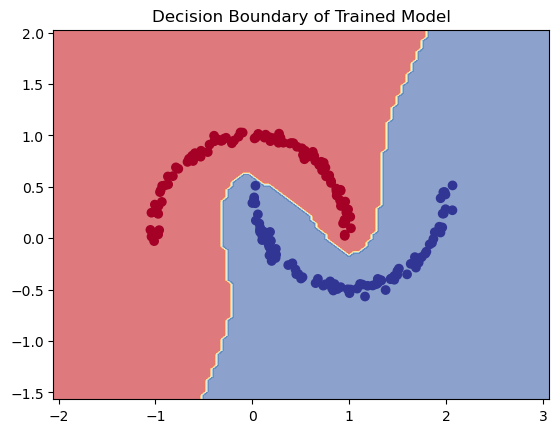

In [14]:
plot_decision_boundary(model=my_model, X=X_test, y=y_test)


In [126]:
def tanh(z):
	return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))